<a href="https://colab.research.google.com/github/budhathoki10/Concept_and_Technology_of_AI/blob/master/Worksheet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#Load the Dataset:
df= pd.read_csv("/content/drive/MyDrive/diabetes_.csv")
#df.head()
#df.tail()
#df.describe()
null_values= df.isnull().sum()
print(f"{null_values}")

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [48]:
#• Handle any missing values appropriately, either by dropping or imputing them based on the data.
df_clean= df.dropna()
#print(df_clean)

X= df_clean.drop(columns="Outcome").values
Y= df_clean["Outcome"].values
#print(X.shape[0])
#print(int(len(X) *0.3))
def train_test_split_scratch(X,Y, test_size=0.3, seed=42):
   np.random.seed(seed)
   indices= np.arange(X.shape[0]) #prints the number from 0 to 767
   np.random.shuffle(indices) #shuffle
   test_split_size= int(len(X) *test_size)
   test_idx= indices[:test_split_size]
   train_idx= indices[test_split_size:]
   X_train= X[train_idx]
   X_test= X[test_idx]
   Y_train=Y[train_idx]
   Y_test=Y[test_idx]
   return X_train,X_test,Y_train,Y_test
X_train, X_test, Y_train, Y_test = train_test_split_scratch(X, Y)
print(f"Xtrain shape {X_train.shape}")
print(f"Xtest shape {X_test.shape}")
print(f"Ytrain shape {Y_train.shape}")
print(f"Ytest shape {Y_test.shape}")


# implementing KNN
def Encludiean_distance(a,b):
  return np.sqrt(np.sum((a-b)**2))

#Predicting the class for a single query.
def knn_predict_single (x, X_train, Y_train,k=3):
  distances = []
  for point in X_train:
      distances.append(Encludiean_distance(x, point))
      sorted_indx= np.argsort(distances)
      nearest_index=sorted_indx[:k]
      nearest_labels= Y_train[nearest_index]
      prediction= np.bincount(nearest_labels).argmax()
  return prediction

#Predicting classes for all test samples.
def knn_predict(X_test, X_train , Y_train, k=3):
  preds=[]
  for sample in X_test:
      preds.append(knn_predict_single(sample, X_train, Y_train,k ))
  return np.array(preds)

#performance accuracy
def compute_accuracy(y_true, y_pred):
  correctvalues= np.sum(y_true==y_pred)
  return (correctvalues/len(y_true)*100)

predictions = knn_predict(X_test, X_train, Y_train, k=5)

accuracy = compute_accuracy(Y_test, predictions)

print(" Predictions:", predictions[:5])
print(f"the accuracy is {accuracy} %")


Xtrain shape (538, 8)
Xtest shape (230, 8)
Ytrain shape (538,)
Ytest shape (230,)
 Predictions: [1 0 0 0 0]
the accuracy is 68.69565217391305 %


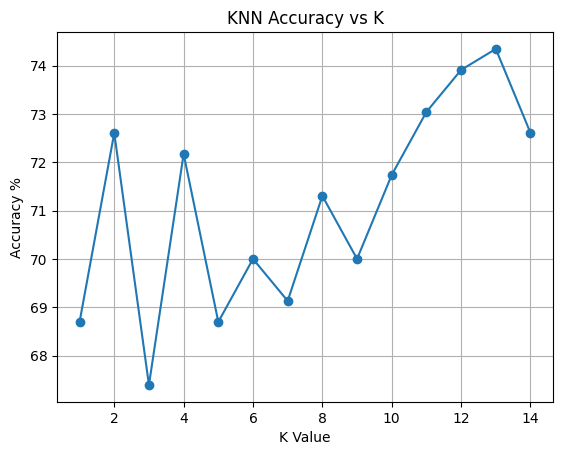

In [56]:
k_values = range(1, 15)
acc_list = []

for k in k_values:
    preds = knn_predict(X_test, X_train, Y_train, k)
    acc_list.append(compute_accuracy(Y_test, preds))

plt.plot(k_values, acc_list, marker="o")
plt.xlabel("K Value")
plt.ylabel("Accuracy %")
plt.title("KNN Accuracy vs K")
plt.grid(True)
plt.show()